In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression


#We parse the data as datetime type to be able to manipulate dates as data and not strings
parsed_date = ['date']
df = pd.read_csv('cleaned_data.csv', parse_dates=parsed_date) 

In [2]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 22 columns):
Unnamed: 0       21596 non-null int64
id               21596 non-null int64
date             21596 non-null datetime64[ns]
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: datetime64[ns](1), fl

In [4]:
df.replace({'sqft_basement': '?'}, {'sqft_basement': 0}, inplace=True)

In [5]:
df.sort_values(by='date', inplace=True, ascending=False)

In [6]:
df['sqft_basement'] = df['sqft_basement'].map(lambda x: float(x))

In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21596.000000,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21533.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,10797.765790,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233874,...,7.657946,1788.631506,285.702954,1971.000787,83.641489,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,6234.710559,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.765702,...,1.173218,827.763251,439.825454,29.375460,399.957185,53.514040,0.138552,0.140725,685.231768,27275.018316
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5398.750000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10797.500000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.250000,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.006722,0.027426,0.009046,0.107077,0.044894,-0.027173,0.180067,-0.007699,-0.013596,...,0.082335,0.072288,-0.040210,0.199891,-0.023358,-0.002076,0.000752,0.008830,0.026728,-0.030300
id,0.006722,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,0.011581,...,0.008169,-0.010831,-0.004336,0.021589,-0.012019,-0.008195,-0.001766,0.020643,-0.002734,-0.138570
price,0.027426,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.395739,...,0.667964,0.605392,0.321103,0.053965,0.129603,-0.053409,0.306687,0.022047,0.585267,0.082849
bedrooms,0.009046,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080922,...,0.366174,0.492543,0.303517,0.160736,0.019429,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.107077,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186446,...,0.665834,0.686664,0.278504,0.507166,0.051044,-0.204778,0.024301,0.224889,0.569878,0.088297
sqft_living,0.044894,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.282528,...,0.762776,0.876448,0.428683,0.318140,0.055654,-0.199793,0.052178,0.241200,0.756400,0.184337
sqft_lot,-0.027173,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075295,...,0.114726,0.184134,0.015038,0.052939,0.004511,-0.129582,-0.085507,0.230222,0.144756,0.718203
floors,0.180067,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028424,...,0.458783,0.523970,-0.241845,0.489175,0.003525,-0.059522,0.049280,0.125912,0.280072,-0.010734
waterfront,-0.007699,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.381999,...,0.082817,0.071776,0.083053,-0.024491,0.081397,0.028925,-0.012154,-0.037632,0.083822,0.030657
view,-0.013596,0.011581,0.395739,0.080922,0.186446,0.282528,0.075295,0.028424,0.381999,1.000000,...,0.249721,0.166290,0.271702,-0.054577,0.100960,0.085284,0.006154,-0.077907,0.279554,0.073328


## Model 1: sample data

In [9]:
for column in df.loc[:,['price', 'sqft_living', 'sqft_living15']]:
    df[column+str('_log')] = df[column].map(lambda x: np.log(x))

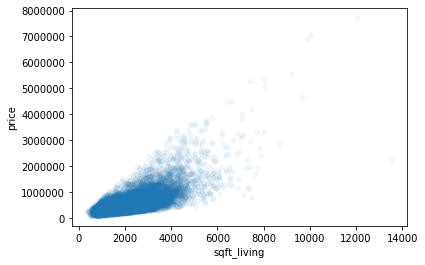

In [10]:
df.plot.scatter(x='sqft_living', y='price', alpha = .05)

In [11]:
df['sqft_basement_dummy'] = df['sqft_basement'].map(lambda x: 1 if x> 0 else 0)

In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_log',
       'sqft_living_log', 'sqft_living15_log', 'sqft_basement_dummy'],
      dtype='object')

In [13]:
df['yr_old'] = df['yr_built'].map(lambda x: 2015 - x)

In [14]:
df_sample = df.iloc[0:17276,:]

In [15]:
df_sample.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,sqft_living_log,sqft_living15_log,sqft_basement_dummy,yr_old
count,17276.000000,1.727600e+04,1.727600e+04,17276.000000,17276.000000,17276.000000,1.727600e+04,17276.000000,17276.000000,17220.000000,...,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000
mean,10795.860095,4.580926e+09,5.357728e+05,3.364610,2.105045,2067.763892,1.517213e+04,1.489841,0.006772,0.231707,...,98077.644941,47.558096,-122.213709,1977.034499,12767.310199,13.040677,7.545160,7.535250,0.381917,43.910107
std,6227.782291,2.875273e+09,3.639527e+05,0.903581,0.765579,907.789549,4.260674e+04,0.540085,0.082018,0.761671,...,53.664322,0.139764,0.140513,678.942150,28031.117008,0.524349,0.423056,0.325573,0.485870,29.271387
min,0.000000,1.000102e+06,8.100000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,...,98001.000000,47.162200,-122.519000,399.000000,651.000000,11.302204,5.966147,5.988961,0.000000,0.000000
25%,5404.750000,2.125074e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.060000e+03,1.000000,0.000000,0.000000,...,98033.000000,47.465100,-122.328000,1480.750000,5100.000000,12.676076,7.258412,7.300304,0.000000,18.000000
50%,10780.500000,3.904940e+09,4.490000e+05,3.000000,2.250000,1900.000000,7.605000e+03,1.500000,0.000000,0.000000,...,98065.000000,47.569600,-122.230000,1830.000000,7614.000000,13.014778,7.549609,7.512071,0.000000,40.000000
75%,16164.750000,7.312200e+09,6.385500e+05,4.000000,2.500000,2530.000000,1.058400e+04,2.000000,0.000000,0.000000,...,98118.000000,47.677800,-122.125000,2350.000000,10007.000000,13.366955,7.835975,7.762171,1.000000,63.000000
max,21596.000000,9.900000e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,...,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,15.856731,9.396820,8.733916,1.000000,115.000000


In [16]:
df_sample.shape

(17276, 27)

In [17]:
df.shape

(21596, 27)

### Setting the variables. Testing sample (80%)

In [18]:
y2 = df_sample['price_log']
X2 = df_sample.loc[:,['grade', 'sqft_living_log', 'sqft_basement_dummy', 'sqft_living15_log', 'floors' ]]

In [19]:
X2 = sm.add_constant(X2) #x is sqft_living
model_sm = sm.OLS(y2,X2)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.56
const                  7.8815
grade                  0.1941
sqft_living_log        0.2483
sqft_basement_dummy    0.1495
sqft_living15_log      0.2254
floors                 0.0317
dtype: float64


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     4411.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:18:07   Log-Likelihood:                -6251.5
No. Observations:               17276   AIC:                         1.252e+04
Df Residuals:                   17270   BIC:                         1.256e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.8815      0.074    107.041      0.000       7.737       8.026
grade                   0.1941      0.004     52.143      0.000       0.187       0.201
sqft_living_log         0.2483      0.011     21.692      0.000       0.226       0.271
sqft_basement_dummy     0.1495      0.006     24.392      0.000       0.138       0.162
sqft_living15_log       0.2254      0.013     17.321      0.000       0.200       0.251
floors                  0.0317      0.006      5.348      0.000       0.020       0.043
==============================================================================
Omnibus:                       70.290   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.058
Skew:                           0.156   Prob(JB):                     3.72e-16
Kurtosis:                       2.956   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final Model

In [21]:
y = df['price_log']
X = df.loc[:,['grade', 'sqft_living_log', 'sqft_basement_dummy', 'sqft_living15_log', 'floors' ]]

In [22]:
X = sm.add_constant(X) #x is sqft_living
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))
y_est = results.fittedvalues
# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))



R2 = 0.57
const                  7.8729
grade                  0.1954
sqft_living_log        0.2546
sqft_basement_dummy    0.1502
sqft_living15_log      0.2189
floors                 0.0323
dtype: float64


In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     5648.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:18:08   Log-Likelihood:                -7760.2
No. Observations:               21596   AIC:                         1.553e+04
Df Residuals:                   21590   BIC:                         1.558e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.8729      0.066    120.192      0.000       7.744       8.001
grade                   0.1954      0.003     58.877      0.000       0.189       0.202
sqft_living_log         0.2546      0.010     24.929      0.000       0.235       0.275
sqft_basement_dummy     0.1502      0.005     27.446      0.000       0.139       0.161
sqft_living15_log       0.2189      0.012     18.916      0.000       0.196       0.242
floors                  0.0323      0.005      6.102      0.000       0.022       0.043
==============================================================================
Omnibus:                       72.012   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.676
Skew:                           0.141   Prob(JB):                     1.65e-16
Kurtosis:                       2.966   Cond. No.                         372.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

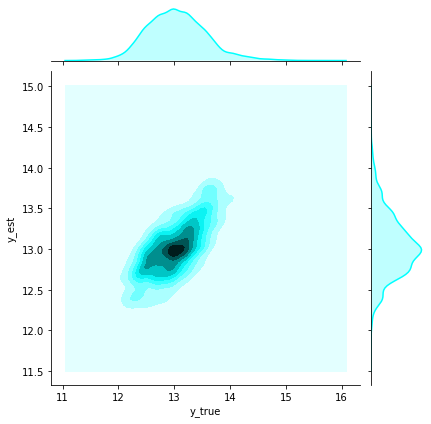

In [24]:
estimation = pd.DataFrame(dict(y_est = y_est, y_true = y)).reset_index()
estimation.describe()


sns.jointplot(x=estimation.y_true, y=estimation.y_est, data=estimation, kind="kde", color='cyan')
# sns.scatterplot(x=estimation.index, y=estimation.y_true, color='Pink', alpha=0.9)


## Log interpretation:
    For a 10% increase in sqft of living, all other variables remaining equal (or unchanged) we would expect the price to increase by 2.5% [(((1.1^0.25)-1)*100]
    Our floor variable, implies that one unit increase (i.e one extra floor) will translate in average into a 3% price increase (exp(0.0323))